<a href="https://colab.research.google.com/github/uoneway/transafer/blob/master/preprocessing/Transafer_bus_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 기본 세팅

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
PROJECT_ID = "project/202008_Seoul-ICT-COC"
ROOT_DIR = "/content/drive/My Drive/Colab Notebooks/" + PROJECT_ID + "/"
DATA_DIR = ROOT_DIR + 'datasets/'
IMAGES_PATH = ROOT_DIR + 'images/'

In [ ]:
# 필수 라이브러리 import
import numpy as np 
import pandas as pd
import os

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')

import warnings
warnings.filterwarnings(action='ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import requests
from bs4 import BeautifulSoup

# 혼잡도 구하기

## 데이터 가져오기

### 파일로 읽어오기

#### 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보
http://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do#

In [ ]:
PROJECT_ID = "Project/202008_Seoul-ICT-COC"
ROOT_DIR = "C:/Users/uonew/" + PROJECT_ID + "/"
DATA_DIR = ROOT_DIR + 'datasets/'
IMAGES_PATH = ROOT_DIR + 'images/'

In [ ]:
# 버스승하차 데이터 목록
getout_bus_data = {
    '20_07': "2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(07월).csv",
    '20_06': "2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(06월).csv",
    '20_05': "2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(05월).csv",
    '20_04': "2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(04월).csv",
    '20_03': "2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(03월).csv",
    '20_02': "2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(02월).csv",
    '20_01': "2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(01월).csv",
    '19': "2019년 버스노선별 정류장별 시간대별 승하차 인원 정보1.csv",
    '18': "2018년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv",
    '17': "2017년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv",
    '16': "2016년_버스노선별_정류장별_시간대별_승하차_인원_정보.csv",
}

getout_bus_data_dir = "버스노선별_정류장별_시간대별_승하차_인원_정보/"
for k, data_file in getout_bus_data.items():
    getout_bus_data[k] = DATA_DIR + getout_bus_data_dir + data_file
getout_bus_data['20_07']

'C:/Users/uonew/Project/202008_Seoul-ICT-COC/datasets/버스노선별_정류장별_시간대별_승하차_인원_정보/2020년_버스노선별_정류장별_시간대별_승하차_인원_정보(07월).csv'

In [ ]:
# 혼잡도 데이터 불러오기
pd.read_csv(getout_bus_data['20_07'],encoding='mbcs').head(1)  #ANSI
#getout_bus_data_20_07_df.

,사용년월,노선ID,노선번호,노선명,표준버스정류장ID,버스정류장ARS번호,역ID,역명,00시승차총승객수,00시하차총승객수,...,19시하차총승객수,20시승차총승객수,20시하차총승객수,21시승차총승객수,21시하차총승객수,22시승차총승객수,22시하차총승객수,23시승차총승객수,23시하차총승객수,등록일자
0,202007,11110001,100,100번(하계동~용산구청),11428,한성여객종점,0,5,0,8,...,6,18,0,3,4,0,7,20200803,NaN,NaN
1,202007,11110001,100,100번(하계동~용산구청),11436,하계1동주민센터,0,0,0,0,...,20,222,7,279,8,0,0,20200803,NaN,NaN
2,202007,11110001,100,100번(하계동~용산구청),08102,창문여고,193,279,33,63,...,454,521,495,431,505,255,318,20200803,NaN,NaN
3,202007,11110001,100,100번(하계동~용산구청),08103,동방고개,15,140,1,37,...,200,47,189,53,183,28,135,20200803,NaN,NaN
4,202007,11110001,100,100번(하계동~용산구청),08104,장위동그린빌아파트,9,132,1,26,...,336,18,257,12,298,5,175,20200803,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,202007,11110014,143,143번(정릉~개포동),08163,정릉4동주민센터.경국사,0,0,0,0,...,56,78,34,5,5,0,0,20200803,NaN,NaN
996,202007,11110014,143,143번(정릉~개포동),08408,북한산보국문역2번출구,0,0,0,0,...,121,119,87,24,12,0,0,20200803,NaN,NaN
997,202007,11110014,143,143번(정릉~개포동),08165,KEB하나은행정릉중앙지점,0,0,0,0,...,72,186,51,45,8,0,0,20200803,NaN,NaN
998,202007,11110014,143,143번(정릉~개포동),08167,정릉시장입구,0,0,0,0,...,156,366,94,101,17,0,0,20200803,NaN,NaN


In [ ]:
for k, data_file in getout_bus_data.items():
    print(k)
    print(pd.read_csv(data_file,encoding='mbcs').columns)

In [ ]:
kr_col_name_list = ['사용년월', '노선ID', '노선번호', '노선명', '표준버스정류장ID', '버스정류장ARS번호', '역ID', '역명',
   '00시승차총승객수', '00시하차총승객수', '1시승차총승객수', '1시하차총승객수', '2시승차총승객수',
   '2시하차총승객수', '3시승차총승객수', '3시하차총승객수', '4시승차총승객수', '4시하차총승객수', '5시승차총승객수',
   '5시하차총승객수', '6시승차총승객수', '6시하차총승객수', '7시승차총승객수', '7시하차총승객수', '8시승차총승객수',
   '8시하차총승객수', '9시승차총승객수', '9시하차총승객수', '10시승차총승객수', '10시하차총승객수',
   '11시승차총승객수', '11시하차총승객수', '12시승차총승객수', '12시하차총승객수', '13시승차총승객수',
   '13시하차총승객수', '14시승차총승객수', '14시하차총승객수', '15시승차총승객수', '15시하차총승객수',
   '16시승차총승객수', '16시하차총승객수', '17시승차총승객수', '17시하차총승객수', '18시승차총승객수',
   '18시하차총승객수', '19시승차총승객수', '19시하차총승객수', '20시승차총승객수', '20시하차총승객수',
   '21시승차총승객수', '21시하차총승객수', '22시승차총승객수', '22시하차총승객수', '23시승차총승객수',
   '23시하차총승객수', '등록일자']
        
eng_col_name_list = ['use_mon', 'bus_route_id', 'bus_route_no', 'bus_route_nm',
    'stnd_bsst_id', 'bsst_ars_no', 'bus_sta_nm', 'midnight_ride_num',
    'midnight_alight_num', 'one_ride_num', 'one_alight_num', 'two_ride_num',
    'two_alight_num', 'three_ride_num', 'three_alight_num', 'four_ride_num',
    'four_alight_num', 'five_ride_num', 'five_alight_num', 'six_ride_num',
    'six_alight_num', 'seven_ride_num', 'seven_alight_num',
    'eight_ride_num', 'eight_alight_num', 'nine_ride_num',
    'nine_alight_num', 'ten_ride_num', 'ten_alight_num', 'eleven_ride_num',
    'eleven_alight_num', 'twelve_ride_num', 'twelve_alight_num',
    'thirteen_ride_num', 'thirteen_alight_num', 'fourteen_ride_num',
    'fourteen_alight_num', 'fifteen_ride_num', 'fifteen_alight_num',
    'sixteen_ride_num', 'sixteen_alight_num', 'seventeen_ride_num',
    'seventeen_alight_num', 'eighteen_ride_num', 'eighteen_alight_num',
    'nineteen_ride_num', 'nineteen_alight_num', 'twenty_ride_num',
    'twenty_alight_num', 'twenty_one_ride_num', 'twenty_one_alight_num',
    'twenty_two_ride_num', 'twenty_two_alight_num', 'twenty_three_ride_num',
    'twenty_three_alight_num', 'work_dt']

corrected_col_name_list = ['use_ym', 'bus_route_id', 'bus_route_no', 'bus_route_nm',
       'stnd_bsst_id', 'bsst_ars_no', 'bus_sta_id', 'bus_sta_nm', ]
for i in range(24):
    corrected_col_name_list.append('ride_' + str(i))
    corrected_col_name_list.append('alight_' + str(i))
corrected_col_name_list.append('work_dt')

print(len(kr_col_name_list), len(eng_col_name_list), len(corrected_col_name_list))
corrected_col_name_list

In [ ]:
corrected_col_name_list

for k, data_file in getout_bus_data.items():
    getout_bus_data[k] = DATA_DIR + getout_bus_data_dir + data_file
getout_bus_data['20_07']

#### 서울시 버스노선별 정류장별 승하차 인원 정보
http://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do#

### api로 받아오기 함수

In [ ]:
!pip install xmltodict

In [ ]:
# import folium
import json
import requests
import xmltodict

import numpy as np
import pandas as pd
import time
import datetime

In [ ]:
api_key = "5743435061756f6e36305a6c6d4c4b"

service_name = 'CardBusStatisticsServiceNew'
service_url = f"http://openapi.seoul.go.kr:8088/{api_key}/xml/{service_name}/"

In [ ]:
def response_to_dict(res):
    return json.loads(json.dumps(xmltodict.parse(res.text)))

#  get list_total_count
def get_list_total_count(date):
    url = service_url + '1/1/' + date
    res = requests.get(url)
    res_dict = response_to_dict(res)
    #print(res_dict)
    list_total_count = int(res_dict[service_name]['list_total_count'])
    return list_total_count
print(get_list_total_count('20190101'))


def get_call_range_list(list_total_count):
    call_range_list = []
    call_capacity = 1000
    q = list_total_count // call_capacity
    r = list_total_count % call_capacity
    
    # 몫 부분  더해주기
    for i in range(q):
        start_index = i * call_capacity + 1
        last_index = (i + 1) * call_capacity   
        call_range_list.append( f'{start_index}/{last_index}/')

    # 나머지 부분 더해주기
    if r != 0:
        start_index = q * call_capacity + 1
        last_index = list_total_count   
        call_range_list.append( f'{start_index}/{last_index}/')

    return call_range_list
print(get_call_range_list(16000))


def get_date_str_list(from_date, to_date, freq='M'):
    date_list = []

    period_range = pd.period_range(from_date, to_date, freq=freq).to_timestamp()

    for date in period_range:
        date_str = date.strftime('%Y%m')
        if freq == 'D':
            date_str = date.strftime('%Y%m%d')
        date_list.append(date_str)

    return date_list
print(get_date_str_list('201801', '201910', 'M'))
print(get_date_str_list('20181201', '20190110', 'D'))

37887
['1/1000/', '1001/2000/', '2001/3000/', '3001/4000/', '4001/5000/', '5001/6000/', '6001/7000/', '7001/8000/', '8001/9000/', '9001/10000/', '10001/11000/', '11001/12000/', '12001/13000/', '13001/14000/', '14001/15000/', '15001/16000/']
['201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812', '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910']
['20181201', '20181202', '20181203', '20181204', '20181205', '20181206', '20181207', '20181208', '20181209', '20181210', '20181211', '20181212', '20181213', '20181214', '20181215', '20181216', '20181217', '20181218', '20181219', '20181220', '20181221', '20181222', '20181223', '20181224', '20181225', '20181226', '20181227', '20181228', '20181229', '20181230', '20181231', '20190101', '20190102', '20190103', '20190104', '20190105', '20190106', '20190107', '20190108', '20190109', '20190110']


In [ ]:
# call
def get_result(service_name, date_list):
    result_list = []
    for date_str in date_list:
        list_total_count = get_list_total_count(date_str)
        call_range_list = get_call_range_list(list_total_count)
        print(f"Start for {date_str}({list_total_count}개)...")
              
        previous_result_len = len(result_list)
        for call_range_str in call_range_list:
            print(call_range_str)
            url = service_url + call_range_str + date_str

            res = requests.get(url)
            res_dict = response_to_dict(res)
            #print(res_dict)
            # if res_dict[service_name]['RESULT']['CODE'] != 'INFO-000':
            #     print('something wrong in %d try' % i)
            #     break

            result_list.extend(res_dict[service_name]['row'])

            #print(i, end='\r')
            time.sleep(0.3)
        current_result_len = len(result_list)
        assert current_result_len == previous_result_len + list_total_count
        print(f"Well done for {date_str}")
    
    return result_list

#### 서울시 버스노선별 정류장별 시간대별 승하차 인원 정보
http://data.seoul.go.kr/dataList/OA-12913/S/1/datasetView.do#

In [ ]:
service_name = 'CardBusTimeNew'
# http://openapi.seoul.go.kr:8088/(인증키)/xml/CardBusTimeNew/1/5/201511/
service_url = f"http://openapi.seoul.go.kr:8088/{api_key}/xml/{service_name}/"

In [ ]:
service_url

'http://openapi.seoul.go.kr:8088/5743435061756f6e36305a6c6d4c4b/xml/CardBusTimeNew/'

In [ ]:
3*38*12*5/60

114.0

In [ ]:
date_list = get_date_str_list('201701', '201812', 'M')
getout_bus_by_time_list = get_result(service_name, date_list) 

{'CardBusTimeNew': {'list_total_count': '38347', 'RESULT': {'CODE': 'INFO-000', 'MESSAGE': '정상 처리되었습니다'}, 'row': {'USE_MON': '201701', 'BUS_ROUTE_NO': '100', 'BUS_ROUTE_NM': '100번(하계동~용산구청)', 'STND_BSST_ID': '100000003', 'BSST_ARS_NO': '01003', 'BUS_STA_NM': '명륜3가.성대입구', 'MIDNIGHT_RIDE_NUM': '1', 'MIDNIGHT_ALIGHT_NUM': '0', 'ONE_RIDE_NUM': '0', 'ONE_ALIGHT_NUM': '0', 'TWO_RIDE_NUM': '0', 'TWO_ALIGHT_NUM': '0', 'THREE_RIDE_NUM': '0', 'THREE_ALIGHT_NUM': '0', 'FOUR_RIDE_NUM': '173', 'FOUR_ALIGHT_NUM': '160', 'FIVE_RIDE_NUM': '159', 'FIVE_ALIGHT_NUM': '260', 'SIX_RIDE_NUM': '83', 'SIX_ALIGHT_NUM': '304', 'SEVEN_RIDE_NUM': '183', 'SEVEN_ALIGHT_NUM': '398', 'EIGHT_RIDE_NUM': '243', 'EIGHT_ALIGHT_NUM': '536', 'NINE_RIDE_NUM': '144', 'NINE_ALIGHT_NUM': '506', 'TEN_RIDE_NUM': '122', 'TEN_ALIGHT_NUM': '392', 'ELEVEN_RIDE_NUM': '115', 'ELEVEN_ALIGHT_NUM': '404', 'TWELVE_RIDE_NUM': '131', 'TWELVE_ALIGHT_NUM': '387', 'THIRTEEN_RIDE_NUM': '150', 'THIRTEEN_ALIGHT_NUM': '439', 'FOURTEEN_RIDE_NUM': '1

In [ ]:
getout_bus_by_time_df = pd.DataFrame(getout_bus_by_time_list)
getout_bus_by_time_df

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,ELEVEN_RIDE_NUM,ELEVEN_ALIGHT_NUM,TWELVE_RIDE_NUM,TWELVE_ALIGHT_NUM,THIRTEEN_RIDE_NUM,THIRTEEN_ALIGHT_NUM,FOURTEEN_RIDE_NUM,FOURTEEN_ALIGHT_NUM,FIFTEEN_RIDE_NUM,FIFTEEN_ALIGHT_NUM,SIXTEEN_RIDE_NUM,SIXTEEN_ALIGHT_NUM,SEVENTEEN_RIDE_NUM,SEVENTEEN_ALIGHT_NUM,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM,TWENTY_THREE_RIDE_NUM,TWENTY_THREE_ALIGHT_NUM,WORK_DT
0,201901,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,0,0,0,0,0,0,0,0,86,151,219,306,66,378,193,461,253,505,187,512,115,421,167,442,140,370,229,436,219,406,218,348,217,293,272,302,218,290,194,189,189,102,193,111,174,80,59,25,20190203
1,201901,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔,123,15,0,0,0,0,0,0,0,0,2,14,33,171,53,542,64,1114,73,516,57,230,94,176,134,141,174,173,198,125,380,171,276,175,405,113,459,162,356,91,343,51,419,42,285,51,304,44,20190203
2,201901,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴,53,11,0,0,0,0,0,0,0,0,28,6,114,108,301,153,491,484,187,303,188,155,216,115,250,114,369,150,278,109,444,124,334,117,393,120,664,93,359,61,347,45,413,35,347,14,205,16,20190203
3,201901,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로,2,0,0,0,0,0,0,0,0,0,9,27,15,8,16,8,32,11,29,13,22,15,19,13,23,24,43,26,27,34,27,27,58,24,30,25,42,22,21,26,18,11,12,9,26,20,6,3,20190203
4,201901,100,100번(하계동~용산구청),101000061,02160,을지로3가,0,0,0,0,0,0,0,0,16,327,10,777,5,383,19,688,72,1253,68,752,89,449,108,384,179,427,163,414,193,330,195,326,196,294,217,348,316,536,203,305,194,177,185,139,243,110,137,44,20190203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677318,202007,143,143번(정릉~개포동),107000073,08163,정릉4동주민센터.경국사,0,0,0,0,0,0,0,0,75,15,119,26,286,115,746,471,506,389,516,210,341,103,274,145,268,121,243,89,218,81,242,82,195,95,221,81,177,94,82,53,75,56,78,34,5,5,0,0,20200803
677319,202007,143,143번(정릉~개포동),107000518,08408,북한산보국문역2번출구,0,0,0,0,0,0,0,0,175,11,265,43,409,227,986,1049,1150,746,669,453,381,298,397,339,412,291,410,261,324,220,264,161,325,216,395,257,400,269,235,146,160,121,119,87,24,12,0,0,20200803
677320,202007,143,143번(정릉~개포동),107000075,08165,KEB하나은행정릉중앙지점,0,0,0,0,0,0,0,0,531,21,417,22,611,29,1068,24,1075,96,839,138,548,124,632,126,645,117,626,137,568,140,524,105,542,107,612,148,572,128,366,113,264,72,186,51,45,8,0,0,20200803
677321,202007,143,143번(정릉~개포동),107000077,08167,정릉시장입구,0,0,0,0,0,0,0,0,581,8,513,18,697,54,1406,65,1626,139,1227,276,1171,330,1068,321,1225,290,1135,273,1022,325,852,238,952,297,1054,349,1049,330,664,241,473,156,366,94,101,17,0,0,20200803


In [ ]:
getout_bus_by_time_df.to_csv(DATA_DIR + 'getout_bus_by_time_df(2019-2020).csv', index=False)

#### 서울시 버스노선별 정류장별 승하차 인원 정보
http://data.seoul.go.kr/dataList/OA-12912/S/1/datasetView.do#

In [ ]:
service_name = 'CardBusStatisticsServiceNew'
# http://openapi.seoul.go.kr:8088/(인증키)/xml/CardBusStatisticsServiceNew/1/5/20151101/
service_url = f"http://openapi.seoul.go.kr:8088/{api_key}/xml/{service_name}/"

In [ ]:
service_url

'http://openapi.seoul.go.kr:8088/5743435061756f6e36305a6c6d4c4b/xml/CardBusStatisticsServiceNew/'

In [ ]:
date_list = get_date_str_list('20200101', '20200815', 'D')
getout_bus_by_date_list = get_result(service_name, date_list) 

In [ ]:
getout_bus_by_date_df = pd.DataFrame(getout_bus_by_date_list)
getout_bus_by_date_df

In [ ]:
getout_bus_by_date_df.to_csv(DATA_DIR + 'getout_bus_by_date_df(2020).csv', index=False)

## 전처리

In [ ]:
def getOptColDtype(df, col):
    col_dtype = df[col].dtype
    col_max = df[col].max()
    col_min = df[col].min()
    
    if np.issubdtype(col_dtype, np.integer):
        dtype_list = [np.dtype('int8'), np.dtype('int16'), np.dtype('int32'), np.dtype('int64')]
        dtype_info_func = np.iinfo
    
    elif np.issubdtype(col_dtype, np.floating):
        dtype_list = [np.dtype('float16'), np.dtype('float32'), np.dtype('float64'), np.dtype('float128')]
        dtype_info_func = np.finfo

    if col_dtype in dtype_list:
        check_count = dtype_list.index(col_dtype)
        
        for idx, dtype in enumerate(dtype_list[:check_count]):
            # update dtype if min/max within smaller dtype
            if (col_max <= dtype_info_func(dtype).max) and (col_min >= dtype_info_func(dtype).min):
                col_dtype = dtype
                break
    
    return col_dtype


def getOptColDict(df):
    col_dtype_dict = {}

    # get non-numeric column names
    nonnum_cols = df[df.select_dtypes(exclude=['number']).columns].columns
    for nonnum_col in nonnum_cols:
        col_dtype_dict[nonnum_col] = df[nonnum_col].dtype

    # get numeric column names
    num_cols = df[df.select_dtypes(include=['number']).columns].columns

    for num_col in num_cols:
        col_dtype_dict[num_col] = getOptColDtype(df, num_col)

    return col_dtype_dict

In [ ]:
getout_bus_by_time_url = "https://drive.google.com/uc?id=1g_Bpv3wpkjRPcXEbA3v79p55mVtuU9pp"
!gdown $getout_bus_by_time_url
getout_bus_by_time_file = "getout_bus_by_time_df(2019-2020).csv"

getout_bus_by_date_url = "https://drive.google.com/uc?id=1doatnYiABbccT_RYH5YH5ohaFdKleOCQ"
!gdown $getout_bus_by_date_url
getout_bus_by_date_file = "getout_bus_by_date_df(2020).csv"

Downloading...
From: https://drive.google.com/uc?id=1g_Bpv3wpkjRPcXEbA3v79p55mVtuU9pp
To: /content/getout_bus_by_time_df(2019-2020).csv
167MB [00:01, 127MB/s]
Downloading...
From: https://drive.google.com/uc?id=1doatnYiABbccT_RYH5YH5ohaFdKleOCQ
To: /content/getout_bus_by_date_df(2020).csv
1.02GB [00:07, 142MB/s]


In [ ]:
getout_bus_by_time_df = pd.read_csv(getout_bus_by_time_file)
getout_bus_by_time_df = getout_bus_by_time_df.astype(getOptColDict(getout_bus_by_time_df))
getout_bus_by_time_df

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,MIDNIGHT_RIDE_NUM,MIDNIGHT_ALIGHT_NUM,ONE_RIDE_NUM,ONE_ALIGHT_NUM,TWO_RIDE_NUM,TWO_ALIGHT_NUM,THREE_RIDE_NUM,THREE_ALIGHT_NUM,FOUR_RIDE_NUM,FOUR_ALIGHT_NUM,FIVE_RIDE_NUM,FIVE_ALIGHT_NUM,SIX_RIDE_NUM,SIX_ALIGHT_NUM,SEVEN_RIDE_NUM,SEVEN_ALIGHT_NUM,EIGHT_RIDE_NUM,EIGHT_ALIGHT_NUM,NINE_RIDE_NUM,NINE_ALIGHT_NUM,TEN_RIDE_NUM,TEN_ALIGHT_NUM,ELEVEN_RIDE_NUM,ELEVEN_ALIGHT_NUM,TWELVE_RIDE_NUM,TWELVE_ALIGHT_NUM,THIRTEEN_RIDE_NUM,THIRTEEN_ALIGHT_NUM,FOURTEEN_RIDE_NUM,FOURTEEN_ALIGHT_NUM,FIFTEEN_RIDE_NUM,FIFTEEN_ALIGHT_NUM,SIXTEEN_RIDE_NUM,SIXTEEN_ALIGHT_NUM,SEVENTEEN_RIDE_NUM,SEVENTEEN_ALIGHT_NUM,EIGHTEEN_RIDE_NUM,EIGHTEEN_ALIGHT_NUM,NINETEEN_RIDE_NUM,NINETEEN_ALIGHT_NUM,TWENTY_RIDE_NUM,TWENTY_ALIGHT_NUM,TWENTY_ONE_RIDE_NUM,TWENTY_ONE_ALIGHT_NUM,TWENTY_TWO_RIDE_NUM,TWENTY_TWO_ALIGHT_NUM,TWENTY_THREE_RIDE_NUM,TWENTY_THREE_ALIGHT_NUM,WORK_DT
0,201901,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,0,0,0,0,0,0,0,0,86,151,219,306,66,378,193,461,253,505,187,512,115,421,167,442,140,370,229,436,219,406,218,348,217,293,272,302,218,290,194,189,189,102,193,111,174,80,59,25,20190203
1,201901,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔,123,15,0,0,0,0,0,0,0,0,2,14,33,171,53,542,64,1114,73,516,57,230,94,176,134,141,174,173,198,125,380,171,276,175,405,113,459,162,356,91,343,51,419,42,285,51,304,44,20190203
2,201901,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴,53,11,0,0,0,0,0,0,0,0,28,6,114,108,301,153,491,484,187,303,188,155,216,115,250,114,369,150,278,109,444,124,334,117,393,120,664,93,359,61,347,45,413,35,347,14,205,16,20190203
3,201901,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로,2,0,0,0,0,0,0,0,0,0,9,27,15,8,16,8,32,11,29,13,22,15,19,13,23,24,43,26,27,34,27,27,58,24,30,25,42,22,21,26,18,11,12,9,26,20,6,3,20190203
4,201901,100,100번(하계동~용산구청),101000061,02160,을지로3가,0,0,0,0,0,0,0,0,16,327,10,777,5,383,19,688,72,1253,68,752,89,449,108,384,179,427,163,414,193,330,195,326,196,294,217,348,316,536,203,305,194,177,185,139,243,110,137,44,20190203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677318,202007,143,143번(정릉~개포동),107000073,08163,정릉4동주민센터.경국사,0,0,0,0,0,0,0,0,75,15,119,26,286,115,746,471,506,389,516,210,341,103,274,145,268,121,243,89,218,81,242,82,195,95,221,81,177,94,82,53,75,56,78,34,5,5,0,0,20200803
677319,202007,143,143번(정릉~개포동),107000518,08408,북한산보국문역2번출구,0,0,0,0,0,0,0,0,175,11,265,43,409,227,986,1049,1150,746,669,453,381,298,397,339,412,291,410,261,324,220,264,161,325,216,395,257,400,269,235,146,160,121,119,87,24,12,0,0,20200803
677320,202007,143,143번(정릉~개포동),107000075,08165,KEB하나은행정릉중앙지점,0,0,0,0,0,0,0,0,531,21,417,22,611,29,1068,24,1075,96,839,138,548,124,632,126,645,117,626,137,568,140,524,105,542,107,612,148,572,128,366,113,264,72,186,51,45,8,0,0,20200803
677321,202007,143,143번(정릉~개포동),107000077,08167,정릉시장입구,0,0,0,0,0,0,0,0,581,8,513,18,697,54,1406,65,1626,139,1227,276,1171,330,1068,321,1225,290,1135,273,1022,325,852,238,952,297,1054,349,1049,330,664,241,473,156,366,94,101,17,0,0,20200803


In [ ]:
getout_bus_by_date_df = pd.read_csv(getout_bus_by_date_file)
getout_bus_by_date_df

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
0,20200101,11110001,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,70,96,20200104
1,20200101,11110001,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔,82,34,20200104
2,20200101,11110001,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴,69,17,20200104
3,20200101,11110001,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로,11,10,20200104
4,20200101,11110001,100,100번(하계동~용산구청),101000061,02160,을지로3가,48,117,20200104
...,...,...,...,...,...,...,...,...,...,...
8810770,20200815,91000034,9714,9714번(교하운정~서울역),229000849,63657,트리플메디컬타운,51,2,20200818
8810771,20200815,91000034,9714,9714번(교하운정~서울역),229000848,63659,중앙공원,10,0,20200818
8810772,20200815,91000034,9714,9714번(교하운정~서울역),229000847,63674,책향기마을,16,0,20200818
8810773,20200815,91000034,9714,9714번(교하운정~서울역),219000366,36601,대화역,18,31,20200818


### 데이터 살펴보기

- `getout_bus_by_time_df` 6,7월 데이터 이상함

In [ ]:
getout_bus_by_time_df['USE_MON'].value_counts()

202003    39155
202005    39079
202004    39077
202001    39041
202002    38934
201912    38884
201907    38833
201911    38820
201910    38812
201908    38791
201909    38784
201906    38779
201904    38745
201905    38683
201902    38680
201903    38641
201901    38585
202006    16000
202007     1000
Name: USE_MON, dtype: int64

In [ ]:
getout_bus_by_date_df['USE_DT'].value_counts()

20200722    38895
20200730    38894
20200724    38887
20200731    38879
20200717    38878
            ...  
20200315    38172
20200301    38136
20200126    38125
20200124    38108
20200125    37871
Name: USE_DT, Length: 228, dtype: int64

In [ ]:
len(getout_bus_by_date_df[getout_bus_by_date_df['USE_DT'] == 20200815 ] )

38405

API로 받아온  `getout_bus_by_time_df`에는 BUS_ROUTE_ID 가 없음

In [ ]:
print(getout_bus_by_time_df.columns)
print(getout_bus_by_date_df.columns)

- BUS_ROUTE_ID가 odsey의 busLocalBlID와 일치하지 않음!
- `BUS_ROUTE_NO`는 unique 하지 않으나... 중간에 경로가 바뀐것으로 보이며 일단 무시

In [ ]:
len(getout_bus_by_date_df['BUS_ROUTE_ID'].unique())

639

In [ ]:
len(getout_bus_by_date_df['BUS_ROUTE_NO'].unique())

628

In [ ]:
temp_df = getout_bus_by_date_df.loc[:, ['BUS_ROUTE_ID', 'BUS_ROUTE_NO',  'BUS_ROUTE_NM']]

for BUS_ROUTE_ID in temp_df['BUS_ROUTE_ID'].unique():
    temp2_df = temp_df[temp_df['BUS_ROUTE_ID'] == BUS_ROUTE_ID]
    if len(temp2_df['BUS_ROUTE_NM'].unique()) > 1:
        print(temp2_df)

         BUS_ROUTE_ID BUS_ROUTE_NO             BUS_ROUTE_NM
2084         11110027          171            171번(국민대~상암동)
2085         11110027          171            171번(국민대~상암동)
2086         11110027          171            171번(국민대~상암동)
2087         11110027          171            171번(국민대~상암동)
2088         11110027          171            171번(국민대~상암동)
...               ...          ...                      ...
8774534      11110027          171  171번(용마문화복지센터~월드컵파크7단지)
8774535      11110027          171  171번(용마문화복지센터~월드컵파크7단지)
8774536      11110027          171  171번(용마문화복지센터~월드컵파크7단지)
8774537      11110027          171  171번(용마문화복지센터~월드컵파크7단지)
8774538      11110027          171  171번(용마문화복지센터~월드컵파크7단지)

[19430 rows x 3 columns]
         BUS_ROUTE_ID BUS_ROUTE_NO              BUS_ROUTE_NM
2631         11110034          271             271번(면목동~상암동)
2632         11110034          271             271번(면목동~상암동)
2633         11110034          271             271번(면목동~상암동)
2634      

In [ ]:
getout_bus_by_date_df[ getout_bus_by_date_df['BUS_ROUTE_NO']== '1120']

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
6535,20200101,11110126,1120,1120번(덕성여대~하계동),109000117,10202,쌍문동우이빌라,11,3,20200104
6536,20200101,11110126,1120,1120번(덕성여대~하계동),109000128,10213,쌍문동현대.한양아파트,14,25,20200104
6537,20200101,11110126,1120,1120번(덕성여대~하계동),109000131,10216,도봉구보건소앞,50,14,20200104
6538,20200101,11110126,1120,1120번(덕성여대~하계동),109000132,10217,도봉구보건소앞,23,15,20200104
6539,20200101,11110126,1120,1120번(덕성여대~하계동),109000143,10229,창동주공1단지아파트,12,8,20200104
...,...,...,...,...,...,...,...,...,...,...
8778985,20200815,11110126,1120,1120번(하계동~삼양동입구),110000275,11376,중계역2번출구,7,68,20200818
8778986,20200815,11110126,1120,1120번(하계동~삼양동입구),110000288,11389,청계초등학교,2,36,20200818
8778987,20200815,11110126,1120,1120번(하계동~삼양동입구),110000285,11386,홈플러스중계점,0,59,20200818
8778988,20200815,11110126,1120,1120번(하계동~삼양동입구),997000041,~,한성여객종점(가상),0,14,20200818


In [ ]:
# 기점, 종점이 바뀌는 곳이 있으나... 정류소가 늘어나지 한 달에 두 케이스가 모두 들어가 2배 개수가 들어가 있는건 없는듯 함
print(len(getout_bus_by_time_df[(getout_bus_by_time_df['BUS_ROUTE_NO']== '은평06') & (getout_bus_by_time_df['USE_MON']== 201912) ]))
print(len(getout_bus_by_time_df[(getout_bus_by_time_df['BUS_ROUTE_NO']== '은평06') & (getout_bus_by_time_df['USE_MON']== 202001) ]))

21
22


In [ ]:
temp_146_df = getout_bus_by_date_df[(getout_bus_by_date_df['BUS_ROUTE_NO'] == '146') & (getout_bus_by_date_df['USE_DT'] == 20200101)]
temp_146_df

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
1300,20200101,11110017,146,146번(상계주공7단지~강남역),121000088,22164,서초푸르지오써밋.롯데캐슬클래식,48,70,20200104
1301,20200101,11110017,146,146번(상계주공7단지~강남역),121000090,22166,진흥아파트,25,45,20200104
1302,20200101,11110017,146,146번(상계주공7단지~강남역),121000091,22167,강남역.강남역사거리,49,150,20200104
1303,20200101,11110017,146,146번(상계주공7단지~강남역),122000184,23287,강남역.역삼세무서,321,47,20200104
1304,20200101,11110017,146,146번(상계주공7단지~강남역),122000181,23284,강남역12번출구,16,301,20200104
...,...,...,...,...,...,...,...,...,...,...
1429,20200101,11110017,146,146번(상계주공7단지~강남역),122000098,23201,한국무역센터.삼성역,90,133,20200104
1430,20200101,11110017,146,146번(상계주공7단지~강남역),122000114,23217,포스코건너편,82,127,20200104
1431,20200101,11110017,146,146번(상계주공7단지~강남역),122000156,23259,선릉역,172,109,20200104
1432,20200101,11110017,146,146번(상계주공7단지~강남역),122000157,23260,포스코빌딩,113,99,20200104


In [ ]:
temp_146_df.sort_values(by=['BSST_ARS_NO'], axis=0)

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WORK_DT
1419,20200101,11110017,146,146번(상계주공7단지~강남역),103000090,04189,영동대교북단,200,132,20200104
1335,20200101,11110017,146,146번(상계주공7단지~강남역),103000091,04190,노룬산시장앞,75,74,20200104
1342,20200101,11110017,146,146번(상계주공7단지~강남역),103000108,04207,화양사거리,113,140,20200104
1338,20200101,11110017,146,146번(상계주공7단지~강남역),103000109,04208,성수초등학교,68,61,20200104
1395,20200101,11110017,146,146번(상계주공7단지~강남역),103000110,04209,서울효사랑병원,43,77,20200104
...,...,...,...,...,...,...,...,...,...,...
1304,20200101,11110017,146,146번(상계주공7단지~강남역),122000181,23284,강남역12번출구,16,301,20200104
1303,20200101,11110017,146,146번(상계주공7단지~강남역),122000184,23287,강남역.역삼세무서,321,47,20200104
1305,20200101,11110017,146,146번(상계주공7단지~강남역),122000185,23288,역삼역.포스코타워역삼,80,51,20200104
1307,20200101,11110017,146,146번(상계주공7단지~강남역),122000201,23305,한서병원,93,59,20200104


In [ ]:
temp_146_df['STND_BSST_ID'].unique()

array(['121000088', '121000090', '121000091', '122000184', '122000181',
       '122000185', '122000180', '122000201', '122000177', '122000174',
       '122000202', '109000049', '109000047', '109000113', '109000114',
       '109000045', '110000094', '110000095', '110000081', '110000170',
       '110000098', '110000096', '122000066', '110000167', '122000069',
       '110000168', '110000173', '110000082', '110000171', '110000080',
       '110000084', '110000086', '110000085', '104000127', '110000145',
       '103000091', '104000123', '110000089', '103000109', '104000131',
       '110000273', '110000266', '103000108', '104000132', '110000346',
       '110000347', '103000115', '104000142', '104000143', '103000117',
       '104000009', '104000008', '106000008', '106000011', '106000025',
       '106000023', '106000021', '106000026', '106000019', '106000027',
       '106000017', '106000024', '106000022', '106000016', '106000020',
       '106000018', '106000029', '109000051', '109000048', '1090

### df 가공하기

#### getout_bus_by_time 수정하기

In [ ]:
time_colname_list = ['MIDNIGHT_RIDE_NUM', 'MIDNIGHT_ALIGHT_NUM','ONE_RIDE_NUM', 'ONE_ALIGHT_NUM', 'TWO_RIDE_NUM', 'TWO_ALIGHT_NUM',
       'THREE_RIDE_NUM', 'THREE_ALIGHT_NUM', 'FOUR_RIDE_NUM','FOUR_ALIGHT_NUM', 'FIVE_RIDE_NUM', 'FIVE_ALIGHT_NUM', 'SIX_RIDE_NUM',
       'SIX_ALIGHT_NUM', 'SEVEN_RIDE_NUM', 'SEVEN_ALIGHT_NUM','EIGHT_RIDE_NUM', 'EIGHT_ALIGHT_NUM', 'NINE_RIDE_NUM',
       'NINE_ALIGHT_NUM', 'TEN_RIDE_NUM', 'TEN_ALIGHT_NUM', 'ELEVEN_RIDE_NUM','ELEVEN_ALIGHT_NUM', 'TWELVE_RIDE_NUM', 'TWELVE_ALIGHT_NUM',
       'THIRTEEN_RIDE_NUM', 'THIRTEEN_ALIGHT_NUM', 'FOURTEEN_RIDE_NUM','FOURTEEN_ALIGHT_NUM', 'FIFTEEN_RIDE_NUM', 'FIFTEEN_ALIGHT_NUM',
       'SIXTEEN_RIDE_NUM', 'SIXTEEN_ALIGHT_NUM', 'SEVENTEEN_RIDE_NUM','SEVENTEEN_ALIGHT_NUM', 'EIGHTEEN_RIDE_NUM', 'EIGHTEEN_ALIGHT_NUM',
       'NINETEEN_RIDE_NUM', 'NINETEEN_ALIGHT_NUM', 'TWENTY_RIDE_NUM','TWENTY_ALIGHT_NUM', 'TWENTY_ONE_RIDE_NUM', 'TWENTY_ONE_ALIGHT_NUM',
       'TWENTY_TWO_RIDE_NUM', 'TWENTY_TWO_ALIGHT_NUM', 'TWENTY_THREE_RIDE_NUM','TWENTY_THREE_ALIGHT_NUM']

corrected_colname_list = []
ride_colname_list = []
alight_colname_list = []
for i in range(24):
    corrected_colname_list.append('ride_' + str(i))
    corrected_colname_list.append('alight_' + str(i))
    ride_colname_list.append('ride_' + str(i))
    alight_colname_list.append('alight_' + str(i))

getout_bus_by_time_df.rename(columns = dict(zip(time_colname_list, corrected_colname_list)), inplace = True)
getout_bus_by_time_df.head(1)

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,ride_0,alight_0,ride_1,alight_1,ride_2,alight_2,ride_3,alight_3,ride_4,alight_4,ride_5,alight_5,ride_6,alight_6,ride_7,alight_7,ride_8,alight_8,ride_9,alight_9,ride_10,alight_10,ride_11,alight_11,ride_12,alight_12,ride_13,alight_13,ride_14,alight_14,ride_15,alight_15,ride_16,alight_16,ride_17,alight_17,ride_18,alight_18,ride_19,alight_19,ride_20,alight_20,ride_21,alight_21,ride_22,alight_22,ride_23,alight_23,WORK_DT
0,201901,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,0,0,0,0,0,0,0,0,86,151,219,306,66,378,193,461,253,505,187,512,115,421,167,442,140,370,229,436,219,406,218,348,217,293,272,302,218,290,194,189,189,102,193,111,174,80,59,25,20190203


In [ ]:
getout_bus_by_time_l_df = getout_bus_by_time_df.copy()

##### wide to long

In [ ]:
# https://rfriend.tistory.com/279
# id_vars = getout_bus_by_time_fix_df.columns[:6]
# getout_bus_by_time_fix_df = getout_bus_by_time_fix_df.melt(id_vars=id_vars, 
#                             var_name="TIME_GETOUT_NUM_temp", 
#                             value_name="GETOUT_NUM")
# getout_bus_by_time_fix_df[['RIDE_OR_ALIGHT','TIME']] = getout_bus_by_time_fix_df['TIME_GETOUT_NUM_temp'].str.split('_', expand=True) 

getout_bus_by_time_l_df["idx"] = getout_bus_by_time_l_df.index
getout_bus_by_time_l_df = pd.wide_to_long(getout_bus_by_time_l_df, 
                                            stubnames=['ride', 'alight'],
                                            i=['idx'],
                                            j='TIME',
                                            sep='_')
getout_bus_by_time_l_df

,,USE_MON,BUS_STA_NM,BUS_ROUTE_NM,STND_BSST_ID,BUS_ROUTE_NO,BSST_ARS_NO,WORK_DT,ride,alight
idx,TIME,,,,,,,,,
0,0,201901,명륜3가.성대입구,100번(하계동~용산구청),100000003,100,01003,20190203,0,0
1,0,201901,을지로입구.로얄호텔,100번(하계동~용산구청),101000057,100,02156,20190203,123,15
2,0,201901,을지로2가.파인에빈뉴,100번(하계동~용산구청),101000060,100,02159,20190203,53,11
3,0,201901,서빙고역교차로,100번(하계동~용산구청),102000173,100,03267,20190203,2,0
4,0,201901,을지로3가,100번(하계동~용산구청),101000061,100,02160,20190203,0,0
...,...,...,...,...,...,...,...,...,...,...
677318,23,202007,정릉4동주민센터.경국사,143번(정릉~개포동),107000073,143,08163,20200803,0,0
677319,23,202007,북한산보국문역2번출구,143번(정릉~개포동),107000518,143,08408,20200803,0,0
677320,23,202007,KEB하나은행정릉중앙지점,143번(정릉~개포동),107000075,143,08165,20200803,0,0


In [ ]:
getout_bus_by_time_lc_df = getout_bus_by_time_l_df.reset_index()
getout_bus_by_time_lc_df.drop(['idx', 'WORK_DT'], axis=1, inplace = True)
getout_bus_by_time_lc_df.rename(columns={'ride': 'RIDE_NUM', 'alight': 'ALIGHT_NUM'}, inplace = True)
getout_bus_by_time_lc_df

,TIME,USE_MON,BUS_STA_NM,BUS_ROUTE_NM,STND_BSST_ID,BUS_ROUTE_NO,BSST_ARS_NO,RIDE_NUM,ALIGHT_NUM
0,0,201901,명륜3가.성대입구,100번(하계동~용산구청),100000003,100,01003,0,0
1,0,201901,을지로입구.로얄호텔,100번(하계동~용산구청),101000057,100,02156,123,15
2,0,201901,을지로2가.파인에빈뉴,100번(하계동~용산구청),101000060,100,02159,53,11
3,0,201901,서빙고역교차로,100번(하계동~용산구청),102000173,100,03267,2,0
4,0,201901,을지로3가,100번(하계동~용산구청),101000061,100,02160,0,0
...,...,...,...,...,...,...,...,...,...
16255747,23,202007,정릉4동주민센터.경국사,143번(정릉~개포동),107000073,143,08163,0,0
16255748,23,202007,북한산보국문역2번출구,143번(정릉~개포동),107000518,143,08408,0,0
16255749,23,202007,KEB하나은행정릉중앙지점,143번(정릉~개포동),107000075,143,08165,0,0
16255750,23,202007,정릉시장입구,143번(정릉~개포동),107000077,143,08167,0,0


##### 정리, 중복제거

In [ ]:
temp_grouped = getout_bus_by_time_lc_df.groupby(['STND_BSST_ID', 'BUS_ROUTE_NO', 'USE_MON']).size()
temp_grouped.unique()

array([24, 48, 72])

중복되어 들어가있는 케이스들

In [ ]:
temp_grouped[temp_grouped == 48]

STND_BSST_ID  BUS_ROUTE_NO  USE_MON
100000001     N37           201901     48
                            201902     48
                            201903     48
                            201904     48
                            201905     48
                                       ..
998101900     N13           202002     48
                            202003     48
                            202004     48
                            202005     48
                            202006     48
Length: 34125, dtype: int64

In [ ]:
temp_grouped[temp_grouped == 72]

STND_BSST_ID  BUS_ROUTE_NO  USE_MON
100000004     03            202001     72
                            202002     72
                            202003     72
                            202004     72
                            202005     72
                                       ..
116000195     N16           202002     72
                            202003     72
                            202004     72
                            202005     72
                            202006     72
Length: 182, dtype: int64

In [ ]:
getout_bus_by_time_lc_df[ (getout_bus_by_time_lc_df['STND_BSST_ID'] == 100000001) &  (getout_bus_by_time_lc_df['BUS_ROUTE_NO'] == 'N37')&  (getout_bus_by_time_lc_df['USE_MON'] == 201901)]

,TIME,USE_MON,BUS_STA_NM,BUS_ROUTE_NM,STND_BSST_ID,BUS_ROUTE_NO,BSST_ARS_NO,RIDE_NUM,ALIGHT_NUM
37274,0,201901,종로2가사거리,N37번(송파공영차고지~진관공영차고지),100000001,N37,01001,0,1
37385,0,201901,종로2가사거리,N37번(진관공영차고지~송파공영차고지),100000001,N37,01001,0,0
714597,1,201901,종로2가사거리,N37번(송파공영차고지~진관공영차고지),100000001,N37,01001,235,228
714708,1,201901,종로2가사거리,N37번(진관공영차고지~송파공영차고지),100000001,N37,01001,0,0
1391920,2,201901,종로2가사거리,N37번(송파공영차고지~진관공영차고지),100000001,N37,01001,105,159
1392031,2,201901,종로2가사거리,N37번(진관공영차고지~송파공영차고지),100000001,N37,01001,0,0
2069243,3,201901,종로2가사거리,N37번(송파공영차고지~진관공영차고지),100000001,N37,01001,0,0
2069354,3,201901,종로2가사거리,N37번(진관공영차고지~송파공영차고지),100000001,N37,01001,390,399
2746566,4,201901,종로2가사거리,N37번(송파공영차고지~진관공영차고지),100000001,N37,01001,0,0
2746677,4,201901,종로2가사거리,N37번(진관공영차고지~송파공영차고지),100000001,N37,01001,108,68


In [ ]:
# WORK_DT도 동일;
getout_bus_by_time_df[ (getout_bus_by_time_df['STND_BSST_ID'] == 100000001) &  (getout_bus_by_time_df['BUS_ROUTE_NO'] == 'N37')&  (getout_bus_by_time_df['USE_MON'] == 201901)]

# temp_df = getout_bus_by_time_df.loc[:, ['STND_BSST_ID', 'BUS_ROUTE_NO',  'BUS_ROUTE_NM']]

# for BUS_ROUTE_NM in temp_df['BUS_ROUTE_NM'].unique():
#     temp2_df = temp_df[temp_df['BUS_ROUTE_NM'] == BUS_ROUTE_NM]
#     if len(temp2_df) > 12:
#         print(temp2_df)

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,ride_0,alight_0,ride_1,alight_1,ride_2,alight_2,ride_3,alight_3,ride_4,alight_4,ride_5,alight_5,ride_6,alight_6,ride_7,alight_7,ride_8,alight_8,ride_9,alight_9,ride_10,alight_10,ride_11,alight_11,ride_12,alight_12,ride_13,alight_13,ride_14,alight_14,ride_15,alight_15,ride_16,alight_16,ride_17,alight_17,ride_18,alight_18,ride_19,alight_19,ride_20,alight_20,ride_21,alight_21,ride_22,alight_22,ride_23,alight_23,WORK_DT
37274,201901,N37,N37번(송파공영차고지~진관공영차고지),100000001,01001,종로2가사거리,0,1,235,228,105,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20190203
37385,201901,N37,N37번(진관공영차고지~송파공영차고지),100000001,01001,종로2가사거리,0,0,0,0,0,0,390,399,108,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20190203


In [ ]:
getout_bus_by_time_lc_df[ (getout_bus_by_time_lc_df['STND_BSST_ID'] == 100000004) &  (getout_bus_by_time_lc_df['BUS_ROUTE_NO'] == '03')&  (getout_bus_by_time_lc_df['USE_MON'] == 202001)]

,TIME,USE_MON,BUS_STA_NM,BUS_ROUTE_NM,STND_BSST_ID,BUS_ROUTE_NO,BSST_ARS_NO,RIDE_NUM,ALIGHT_NUM
470701,0,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0
470706,0,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0
470708,0,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0
1148024,1,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0
1148029,1,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0
...,...,...,...,...,...,...,...,...,...
15371812,22,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0
15371814,22,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0
16049130,23,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,1,0
16049135,23,202001,종로2가.삼일교,03번(시청앞~시청앞),100000004,03,01004,0,0


In [ ]:
getout_bus_by_time_df[ (getout_bus_by_time_df['STND_BSST_ID'] == 100000004) &  (getout_bus_by_time_df['BUS_ROUTE_NO'] == '03')&  (getout_bus_by_time_df['USE_MON'] == 202001)]

,USE_MON,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,ride_0,alight_0,ride_1,alight_1,ride_2,alight_2,ride_3,alight_3,ride_4,alight_4,ride_5,alight_5,ride_6,alight_6,ride_7,alight_7,ride_8,alight_8,ride_9,alight_9,ride_10,alight_10,ride_11,alight_11,ride_12,alight_12,ride_13,alight_13,ride_14,alight_14,ride_15,alight_15,ride_16,alight_16,ride_17,alight_17,ride_18,alight_18,ride_19,alight_19,ride_20,alight_20,ride_21,alight_21,ride_22,alight_22,ride_23,alight_23,WORK_DT
470701,202001,03,03번(시청앞~시청앞),100000004,01004,종로2가.삼일교,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,1,0,1,1,1,0,0,0,1,0,0,0,0,0,1,0,20200203
470706,202001,03,03번(시청앞~시청앞),100000004,01004,종로2가.삼일교,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,20200203
470708,202001,03,03번(시청앞~시청앞),100000004,01004,종로2가.삼일교,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,0,1,2,1,0,1,0,1,1,0,0,0,0,3,0,20200203


In [ ]:
# 첫번째 줄만 살리기
cols = ['TIME', 'BUS_STA_NM', 'BUS_ROUTE_NM', 'STND_BSST_ID', 'BSST_ARS_NO', 'BUS_ROUTE_NO', 'USE_MON']
getout_bus_by_time_lc_df = getout_bus_by_time_lc_df.drop_duplicates( cols, keep="first" )  # 16255752 -> 15983928
getout_bus_by_time_lc_df

,TIME,USE_MON,BUS_STA_NM,BUS_ROUTE_NM,STND_BSST_ID,BUS_ROUTE_NO,BSST_ARS_NO,RIDE_NUM,ALIGHT_NUM
0,0,201901,명륜3가.성대입구,100번(하계동~용산구청),100000003,100,01003,0,0
1,0,201901,을지로입구.로얄호텔,100번(하계동~용산구청),101000057,100,02156,123,15
2,0,201901,을지로2가.파인에빈뉴,100번(하계동~용산구청),101000060,100,02159,53,11
3,0,201901,서빙고역교차로,100번(하계동~용산구청),102000173,100,03267,2,0
4,0,201901,을지로3가,100번(하계동~용산구청),101000061,100,02160,0,0
...,...,...,...,...,...,...,...,...,...
16255747,23,202007,정릉4동주민센터.경국사,143번(정릉~개포동),107000073,143,08163,0,0
16255748,23,202007,북한산보국문역2번출구,143번(정릉~개포동),107000518,143,08408,0,0
16255749,23,202007,KEB하나은행정릉중앙지점,143번(정릉~개포동),107000075,143,08165,0,0
16255750,23,202007,정릉시장입구,143번(정릉~개포동),107000077,143,08167,0,0


In [ ]:
print(16255752 - 15983928)
print(len(getout_bus_by_time_lc_df[getout_bus_by_time_lc_df['BUS_ROUTE_NO'] == "N37"]))

271824
91368


##### 비율값으로 바꿔주기

In [ ]:
ride_sum_grouped = getout_bus_by_time_lc_df.groupby(['STND_BSST_ID', 'BUS_ROUTE_NO', 'USE_MON']).agg({'RIDE_NUM': 'sum'})
getout_bus_by_time_lcp_df = getout_bus_by_time_lc_df.merge(ride_sum_grouped, how='left', on=['STND_BSST_ID', 'BUS_ROUTE_NO', 'USE_MON'])
#getout_bus_by_time_lcp_df[ (getout_bus_by_time_lcp_df['STND_BSST_ID'] == 100000003) &  (getout_bus_by_time_lcp_df['BUS_ROUTE_NO'] == '100')&  (getout_bus_by_time_lcp_df['USE_MON'] == 201901)]
getout_bus_by_time_lcp_df['RIDE_PCT'] = round(getout_bus_by_time_lcp_df['RIDE_NUM_x'] / getout_bus_by_time_lcp_df['RIDE_NUM_y'], 4)
getout_bus_by_time_lcp_df

,TIME,USE_MON,BUS_STA_NM,BUS_ROUTE_NM,STND_BSST_ID,BUS_ROUTE_NO,BSST_ARS_NO,RIDE_NUM_x,ALIGHT_NUM,RIDE_NUM_y,RIDE_PCT
0,0,201901,명륜3가.성대입구,100번(하계동~용산구청),100000003,100,01003,0,0,3608.0,0.0000
1,0,201901,을지로입구.로얄호텔,100번(하계동~용산구청),101000057,100,02156,123,15,4232.0,0.0291
2,0,201901,을지로2가.파인에빈뉴,100번(하계동~용산구청),101000060,100,02159,53,11,5981.0,0.0089
3,0,201901,서빙고역교차로,100번(하계동~용산구청),102000173,100,03267,2,0,477.0,0.0042
4,0,201901,을지로3가,100번(하계동~용산구청),101000061,100,02160,0,0,2808.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
15983923,23,202007,정릉4동주민센터.경국사,143번(정릉~개포동),107000073,143,08163,0,0,4667.0,0.0000
15983924,23,202007,북한산보국문역2번출구,143번(정릉~개포동),107000518,143,08408,0,0,7500.0,0.0000
15983925,23,202007,KEB하나은행정릉중앙지점,143번(정릉~개포동),107000075,143,08165,0,0,10671.0,0.0000
15983926,23,202007,정릉시장입구,143번(정릉~개포동),107000077,143,08167,0,0,17182.0,0.0000


In [ ]:
alight_sum_grouped = getout_bus_by_time_lc_df.groupby(['STND_BSST_ID', 'BUS_ROUTE_NO', 'USE_MON']).agg({'ALIGHT_NUM': 'sum'})
getout_bus_by_time_lcp_df = getout_bus_by_time_lcp_df.merge(alight_sum_grouped, how='left', on=['STND_BSST_ID', 'BUS_ROUTE_NO', 'USE_MON'])
getout_bus_by_time_lcp_df['ALIGHT_PCT'] = round(getout_bus_by_time_lcp_df['ALIGHT_NUM_x'] / getout_bus_by_time_lcp_df['ALIGHT_NUM_y'], 4)
getout_bus_by_time_lcp_df

,TIME,USE_MON,BUS_STA_NM,BUS_ROUTE_NM,STND_BSST_ID,BUS_ROUTE_NO,BSST_ARS_NO,RIDE_NUM_x,ALIGHT_NUM_x,RIDE_NUM_y,RIDE_PCT,ALIGHT_NUM_y,ALIGHT_PCT
0,0,201901,명륜3가.성대입구,100번(하계동~용산구청),100000003,100,01003,0,0,3608.0,0.0000,6128.0,0.0000
1,0,201901,을지로입구.로얄호텔,100번(하계동~용산구청),101000057,100,02156,123,15,4232.0,0.0291,4117.0,0.0036
2,0,201901,을지로2가.파인에빈뉴,100번(하계동~용산구청),101000060,100,02159,53,11,5981.0,0.0089,2333.0,0.0047
3,0,201901,서빙고역교차로,100번(하계동~용산구청),102000173,100,03267,2,0,477.0,0.0042,346.0,0.0000
4,0,201901,을지로3가,100번(하계동~용산구청),101000061,100,02160,0,0,2808.0,0.0000,8463.0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15983923,23,202007,정릉4동주민센터.경국사,143번(정릉~개포동),107000073,143,08163,0,0,4667.0,0.0000,2265.0,0.0000
15983924,23,202007,북한산보국문역2번출구,143번(정릉~개포동),107000518,143,08408,0,0,7500.0,0.0000,5207.0,0.0000
15983925,23,202007,KEB하나은행정릉중앙지점,143번(정릉~개포동),107000075,143,08165,0,0,10671.0,0.0000,1706.0,0.0000
15983926,23,202007,정릉시장입구,143번(정릉~개포동),107000077,143,08167,0,0,17182.0,0.0000,3821.0,0.0000


In [ ]:
#하루동안 0이라 NAN값 나오는 것들 처리
print(getout_bus_by_time_lcp_df.isnull().sum())
getout_bus_by_time_lcp_df['RIDE_PCT'] = getout_bus_by_time_lcp_df['RIDE_PCT'].fillna(0)
getout_bus_by_time_lcp_df['ALIGHT_PCT'] = getout_bus_by_time_lcp_df['ALIGHT_PCT'].fillna(0)
print(getout_bus_by_time_lcp_df.isnull().sum())

TIME                0
USE_MON             0
BUS_STA_NM          0
BUS_ROUTE_NM        0
STND_BSST_ID        0
BUS_ROUTE_NO        0
BSST_ARS_NO         0
RIDE_NUM_x          0
ALIGHT_NUM_x        0
RIDE_NUM_y          0
RIDE_PCT        65592
ALIGHT_NUM_y        0
ALIGHT_PCT      15264
dtype: int64
TIME            0
USE_MON         0
BUS_STA_NM      0
BUS_ROUTE_NM    0
STND_BSST_ID    0
BUS_ROUTE_NO    0
BSST_ARS_NO     0
RIDE_NUM_x      0
ALIGHT_NUM_x    0
RIDE_NUM_y      0
RIDE_PCT        0
ALIGHT_NUM_y    0
ALIGHT_PCT      0
dtype: int64


In [ ]:
# col 이름 바꿔주기
col_dict = {'RIDE_NUM_x': 'RIDE_NUM', 'ALIGHT_NUM_x': 'ALIGHT_NUM', 'RIDE_NUM_y': 'RIDE_SUM', 'ALIGHT_NUM_y': 'ALIGHT_SUM'}
getout_bus_by_time_lcp_df.rename(columns=col_dict, inplace=True)

In [ ]:
# col 순서 정리
cols = ['BUS_ROUTE_NO', 'BUS_ROUTE_NM', 
        'STND_BSST_ID', 'BSST_ARS_NO', 'BUS_STA_NM',
        'USE_MON', 'TIME',
        'RIDE_NUM', 'RIDE_PCT',	'ALIGHT_NUM', 'ALIGHT_PCT']  #  'RIDE_SUM', 'ALIGHT_SUM'
getout_bus_by_time_lcp_df = getout_bus_by_time_lcp_df[cols]
getout_bus_by_time_lcp_df

,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_MON,TIME,RIDE_NUM,RIDE_PCT,ALIGHT_NUM,ALIGHT_PCT
0,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,201901,0,0,0.0000,0,0.0000
1,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔,201901,0,123,0.0291,15,0.0036
2,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴,201901,0,53,0.0089,11,0.0047
3,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로,201901,0,2,0.0042,0,0.0000
4,100,100번(하계동~용산구청),101000061,02160,을지로3가,201901,0,0,0.0000,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...
15983923,143,143번(정릉~개포동),107000073,08163,정릉4동주민센터.경국사,202007,23,0,0.0000,0,0.0000
15983924,143,143번(정릉~개포동),107000518,08408,북한산보국문역2번출구,202007,23,0,0.0000,0,0.0000
15983925,143,143번(정릉~개포동),107000075,08165,KEB하나은행정릉중앙지점,202007,23,0,0.0000,0,0.0000
15983926,143,143번(정릉~개포동),107000077,08167,정릉시장입구,202007,23,0,0.0000,0,0.0000


In [ ]:
getout_bus_by_time_lcp_df.to_csv(DATA_DIR + 'getout_bus_by_time_fix_df.csv', index=False)
getout_bus_by_time_lcp_df[getout_bus_by_time_lcp_df['USE_MON'] == 202005].to_csv(DATA_DIR + 'getout_bus_by_time_fix_df(202005).csv', index=False)

#### getout_bus_by_date 수정하기

In [ ]:
getout_bus_by_date_w_df = getout_bus_by_date_df.copy()
getout_bus_by_date_w_df.drop(['WORK_DT'], axis=1, inplace=True)
getout_bus_by_date_w_df.head()

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM
0,20200101,11110001,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,70,96
1,20200101,11110001,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔,82,34
2,20200101,11110001,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴,69,17
3,20200101,11110001,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로,11,10
4,20200101,11110001,100,100번(하계동~용산구청),101000061,02160,을지로3가,48,117


In [ ]:
getout_bus_by_date_w_df['USE_DT'] = pd.to_datetime(getout_bus_by_date_w_df['USE_DT'], format='%Y%m%d', errors='raise')
getout_bus_by_date_w_df['WEEKDAY'] = getout_bus_by_date_w_df['USE_DT'].dt.weekday
getout_bus_by_date_w_df

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM,WEEKDAY
0,2020-01-01,11110001,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,70,96,2
1,2020-01-01,11110001,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔,82,34,2
2,2020-01-01,11110001,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴,69,17,2
3,2020-01-01,11110001,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로,11,10,2
4,2020-01-01,11110001,100,100번(하계동~용산구청),101000061,02160,을지로3가,48,117,2
...,...,...,...,...,...,...,...,...,...,...
8810770,2020-08-15,91000034,9714,9714번(교하운정~서울역),229000849,63657,트리플메디컬타운,51,2,5
8810771,2020-08-15,91000034,9714,9714번(교하운정~서울역),229000848,63659,중앙공원,10,0,5
8810772,2020-08-15,91000034,9714,9714번(교하운정~서울역),229000847,63674,책향기마을,16,0,5
8810773,2020-08-15,91000034,9714,9714번(교하운정~서울역),219000366,36601,대화역,18,31,5


In [ ]:
# col 이름 바꿔주기
col_dict = {'RIDE_PASGR_NUM': 'RIDE_NUM', 'ALIGHT_PASGR_NUM': 'ALIGHT_NUM'}
getout_bus_by_date_wc_df.rename(columns=col_dict, inplace=True)

In [ ]:
# col 순서 정리
cols = ['BUS_ROUTE_NO', 'BUS_ROUTE_NM', 'BUS_ROUTE_ID',
        'STND_BSST_ID', 'BSST_ARS_NO', 'BUS_STA_NM',
        'USE_DT', 'WEEKDAY',
        'RIDE_NUM', 'ALIGHT_NUM']
getout_bus_by_date_wc_df = getout_bus_by_date_wc_df[cols]
getout_bus_by_date_wc_df

,BUS_ROUTE_NO,BUS_ROUTE_NM,BUS_ROUTE_ID,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_DT,WEEKDAY,RIDE_NUM,ALIGHT_NUM
0,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-01-01,2,70,96
1,100,100번(하계동~용산구청),11110001,101000057,02156,을지로입구.로얄호텔,2020-01-01,2,82,34
2,100,100번(하계동~용산구청),11110001,101000060,02159,을지로2가.파인에빈뉴,2020-01-01,2,69,17
3,100,100번(하계동~용산구청),11110001,102000173,03267,서빙고역교차로,2020-01-01,2,11,10
4,100,100번(하계동~용산구청),11110001,101000061,02160,을지로3가,2020-01-01,2,48,117
...,...,...,...,...,...,...,...,...,...,...
8810770,9714,9714번(교하운정~서울역),91000034,229000849,63657,트리플메디컬타운,2020-08-15,5,51,2
8810771,9714,9714번(교하운정~서울역),91000034,229000848,63659,중앙공원,2020-08-15,5,10,0
8810772,9714,9714번(교하운정~서울역),91000034,229000847,63674,책향기마을,2020-08-15,5,16,0
8810773,9714,9714번(교하운정~서울역),91000034,219000366,36601,대화역,2020-08-15,5,18,31


In [ ]:
getout_bus_by_date_wc_df.to_csv(DATA_DIR + 'getout_bus_by_date_fix_df.csv', index=False)

import datetime
date_20200501 = datetime.datetime.strptime('20200501', '%Y%m%d')
date_20200601 = datetime.datetime.strptime('20200601', '%Y%m%d')
getout_bus_by_date_wc_df[(getout_bus_by_date_wc_df['USE_DT'] >= date_20200501) & (getout_bus_by_date_wc_df['USE_DT'] < date_20200601)].to_csv(DATA_DIR + 'getout_bus_by_date_fix_df(202005).csv', index=False)

여전히 하나는...

In [ ]:
temp_df = getout_bus_by_date_fix_20_05_df.loc[:, ['BUS_ROUTE_ID', 'BUS_ROUTE_NO',  'BUS_ROUTE_NM']]

for BUS_ROUTE_ID in temp_df['BUS_ROUTE_ID'].unique():
    temp2_df = temp_df[temp_df['BUS_ROUTE_ID'] == BUS_ROUTE_ID]
    if len(temp2_df['BUS_ROUTE_NM'].unique()) > 1:
        print(temp2_df)

         BUS_ROUTE_ID BUS_ROUTE_NO         BUS_ROUTE_NM
4686627      11110502         강남07      강남07(서울의료원~양재역)
4686628      11110502         강남07      강남07(서울의료원~양재역)
4686629      11110502         강남07      강남07(서울의료원~양재역)
4686630      11110502         강남07      강남07(서울의료원~양재역)
4686631      11110502         강남07      강남07(서울의료원~양재역)
...               ...          ...                  ...
5847715      11110502         강남07  강남07(서울의료원강남분원~양재역)
5847716      11110502         강남07  강남07(서울의료원강남분원~양재역)
5847717      11110502         강남07  강남07(서울의료원강남분원~양재역)
5847718      11110502         강남07  강남07(서울의료원강남분원~양재역)
5847719      11110502         강남07  강남07(서울의료원강남분원~양재역)

[1424 rows x 3 columns]
         BUS_ROUTE_ID BUS_ROUTE_NO       BUS_ROUTE_NM
4690155      11110649         서초01  서초01(매일상가~반포고등학교)
4690156      11110649         서초01  서초01(매일상가~반포고등학교)
4690157      11110649         서초01  서초01(매일상가~반포고등학교)
4690158      11110649         서초01  서초01(매일상가~반포고등학교)
4690159      11110649         서초0

In [ ]:
getout_bus_by_date_fix_20_05_df[(getout_bus_by_date_fix_20_05_df['BUS_ROUTE_NO']=='서초01') & (getout_bus_by_date_fix_20_05_df['USE_DT']==20200503)]

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM
4767267,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121000131,22207,뉴코아아울렛,16,0
4767268,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121900046,22466,서초구립반포도서관.반포리체,2,13
4767269,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121900066,22496,반포래미안아이파크아파트후문,2,0
4767270,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121900067,22497,반포고교,9,5
4767271,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121000976,22539,반포자이아파트,0,2
4767272,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121900100,22551,뉴코아백화점,1,6
4767273,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121900108,22560,경원중학교,0,3
4767274,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121900242,22589,매일상가,3,0
4767275,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121000979,22533,반포자이아파트,0,3
4767276,20200503,11110649,서초01,서초01(매일상가~반포고등학교),121900242,22589,매일상가,2,7


In [ ]:
getout_bus_by_date_fix_20_05_df[(getout_bus_by_date_fix_20_05_df['BUS_ROUTE_NO']=='서초01') & (getout_bus_by_date_fix_20_05_df['USE_DT']==20200506)]

,USE_DT,BUS_ROUTE_ID,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,RIDE_PASGR_NUM,ALIGHT_PASGR_NUM
4883169,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121000131,22207,뉴코아아울렛,44,4
4883170,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121900046,22466,서초구립반포도서관.반포리체,2,40
4883171,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121900055,22480,반포리체,0,1
4883172,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121900066,22496,반포래미안아이파크아파트후문,0,3
4883173,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121900067,22497,반포고교,17,14
4883174,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121000976,22539,반포자이아파트,0,10
4883175,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121900100,22551,뉴코아백화점,1,39
4883176,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121900108,22560,경원중학교,0,5
4883177,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121900242,22589,매일상가,16,3
4883178,20200506,11110649,서초01,서초01(잠원역~반포고등학교),121000979,22533,반포자이아파트,10,6


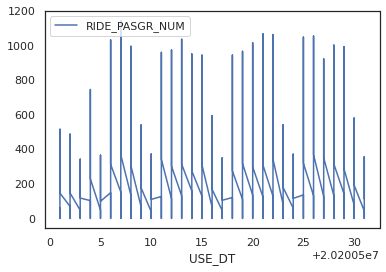

In [ ]:
# temp_df = getout_bus_by_date_fix_20_05_df[getout_bus_by_date_fix_20_05_df['BUS_ROUTE_NO'] == '146']
# temp_df.plot(x='USE_DT', y='RIDE_PASGR_NUM')

#### 연결하기

In [ ]:
getout_bus_by_time_fix_url = "https://drive.google.com/uc?id=1-0Y_xgvJ5wVMltCdTDg_zrpK2V9rNYpy"
!gdown $getout_bus_by_time_fix_url
getout_bus_by_time_fix_file = "getout_bus_by_time_fix_df(202005).csv"

getout_bus_by_date_fix_url = "https://drive.google.com/uc?id=1-8INsuGYSu7fbyDdAdEJEsg32qoMbt64"
!gdown $getout_bus_by_date_fix_url
getout_bus_by_date_fix_file = "getout_bus_by_date_fix_df(202005).csv"

Downloading...
From: https://drive.google.com/uc?id=1-0Y_xgvJ5wVMltCdTDg_zrpK2V9rNYpy
To: /content/getout_bus_by_time_fix_df(202005).csv
102MB [00:00, 246MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1-8INsuGYSu7fbyDdAdEJEsg32qoMbt64
To: /content/getout_bus_by_date_fix_df(202005).csv
134MB [00:00, 200MB/s]


In [ ]:
getout_bus_by_time_fix_df = pd.read_csv(getout_bus_by_time_fix_file)
getout_bus_by_time_fix_df = getout_bus_by_time_fix_df.astype(getOptColDict(getout_bus_by_time_fix_df))
getout_bus_by_time_fix_df.rename(columns={'RIDE_NUM': 'RIDE_MONTH_NUM',
                                          'ALIGHT_NUM': 'ALIGHT_MONTH_NUM'}, inplace=True)
getout_bus_by_time_fix_df

,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_MON,TIME,RIDE_NUM,RIDE_PCT,ALIGHT_NUM,ALIGHT_PCT
0,100,100번(하계동~용산구청),100000003,01003,명륜3가.성대입구,202005,0,0,0.000000,0,0.000000
1,100,100번(하계동~용산구청),101000057,02156,을지로입구.로얄호텔,202005,0,180,0.053314,21,0.006401
2,100,100번(하계동~용산구청),101000060,02159,을지로2가.파인에빈뉴,202005,0,59,0.012398,24,0.011703
3,100,100번(하계동~용산구청),102000173,03267,서빙고역교차로,202005,0,0,0.000000,1,0.002600
4,100,100번(하계동~용산구청),101000061,02160,을지로3가,202005,0,0,0.000000,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
920827,9714,9714번(교하운정~서울역),229000857,63660,중앙공원,202005,23,0,0.000000,33,0.059814
920828,9714,9714번(교하운정~서울역),219000370,36686,마두역(중),202005,23,19,0.036896,9,0.031006
920829,9714,9714번(교하운정~서울역),229001663,63737,교하차고지,202005,23,0,0.000000,1,0.015198
920830,9714,9714번(교하운정~서울역),229001662,63736,교하차고지,202005,23,5,0.058105,0,0.000000


In [ ]:
getout_bus_by_time_fix_df[getout_bus_by_time_fix_df['TIME'].isnull()]

,BUS_ROUTE_NO,BUS_ROUTE_NM,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_MON,TIME,RIDE_NUM,RIDE_PCT,ALIGHT_NUM,ALIGHT_PCT


In [ ]:
getout_bus_by_date_fix_df = pd.read_csv(getout_bus_by_date_fix_file)
getout_bus_by_date_fix_df = getout_bus_by_date_fix_df.astype(getOptColDict(getout_bus_by_date_fix_df))
getout_bus_by_date_fix_df

,BUS_ROUTE_NO,BUS_ROUTE_NM,BUS_ROUTE_ID,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_DT,WEEKDAY,RIDE_NUM,ALIGHT_NUM
0,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,101,133
1,100,100번(하계동~용산구청),11110001,101000057,02156,을지로입구.로얄호텔,2020-05-01,4,77,56
2,100,100번(하계동~용산구청),11110001,101000060,02159,을지로2가.파인에빈뉴,2020-05-01,4,77,43
3,100,100번(하계동~용산구청),11110001,102000173,03267,서빙고역교차로,2020-05-01,4,9,9
4,100,100번(하계동~용산구청),11110001,101000061,02160,을지로3가,2020-05-01,4,58,178
...,...,...,...,...,...,...,...,...,...,...
1199569,9714,9714번(교하운정~서울역),91000034,229000857,63660,중앙공원,2020-05-31,6,0,14
1199570,9714,9714번(교하운정~서울역),91000034,219000370,36686,마두역(중),2020-05-31,6,14,3
1199571,9714,9714번(교하운정~서울역),91000034,229001663,63737,교하차고지,2020-05-31,6,0,2
1199572,9714,9714번(교하운정~서울역),91000034,229001662,63736,교하차고지,2020-05-31,6,1,0


##### 우선 단순히 한달 동일하다고 생각하고 연결하기

In [ ]:
# 원래는 USE_DT 까지 고려해줘야함!!!!!!!!!!!!!!!!
getout_bus_by_date_fix_df.columns

Index(['BUS_ROUTE_NO', 'BUS_ROUTE_NM', 'BUS_ROUTE_ID', 'STND_BSST_ID',
       'BSST_ARS_NO', 'BUS_STA_NM', 'USE_DT', 'WEEKDAY', 'RIDE_NUM',
       'ALIGHT_NUM'],
      dtype='object')

In [ ]:
# STATION 동일한데 명 바뀌는게 있음. ID로만 MERGE
# getout_bus_by_time_fix_df[(getout_bus_by_time_fix_df['BUS_ROUTE_NO'] == '110A') & (getout_bus_by_time_fix_df['STND_BSST_ID'] == 112000073)]  
getout_bus_prep_df = getout_bus_by_date_fix_df.merge(getout_bus_by_time_fix_df[['BUS_ROUTE_NO', 'STND_BSST_ID', 'USE_MON', 'TIME', 'RIDE_MONTH_NUM', 'RIDE_PCT', 'ALIGHT_MONTH_NUM', 'ALIGHT_PCT']],
                                                     how='left', 
                                                     on=['BUS_ROUTE_NO', 'STND_BSST_ID'])
getout_bus_prep_df

,BUS_ROUTE_NO,BUS_ROUTE_NM,BUS_ROUTE_ID,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_DT,WEEKDAY,RIDE_NUM,ALIGHT_NUM,USE_MON,TIME,RIDE_MONTH_NUM,RIDE_PCT,ALIGHT_MONTH_NUM,ALIGHT_PCT
0,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,101,133,202005,0,0,0.000000,0,0.000000
1,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,101,133,202005,1,0,0.000000,0,0.000000
2,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,101,133,202005,2,0,0.000000,0,0.000000
3,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,101,133,202005,3,0,0.000000,0,0.000000
4,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,101,133,202005,4,81,0.031311,136,0.029205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30682555,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,6,9,3,202005,19,59,0.090820,4,0.044403
30682556,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,6,9,3,202005,20,34,0.052307,9,0.099976
30682557,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,6,9,3,202005,21,27,0.041504,10,0.111084
30682558,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,6,9,3,202005,22,57,0.087708,7,0.077820


In [ ]:
getout_bus_prep_df['RIDE_NUM_PRED'] = getout_bus_prep_df['RIDE_NUM'] * getout_bus_prep_df['RIDE_PCT']
getout_bus_prep_df['ALIGHT_NUM_PRED'] = getout_bus_prep_df['ALIGHT_NUM'] * getout_bus_prep_df['ALIGHT_PCT']

In [ ]:
cols = ['BUS_ROUTE_NO', 'BUS_ROUTE_NM', 'BUS_ROUTE_ID', 
        'STND_BSST_ID', 'BSST_ARS_NO', 'BUS_STA_NM', 
        'USE_DT', 'TIME', 'WEEKDAY', 
        'RIDE_NUM_PRED', 'ALIGHT_NUM_PRED', ]  # USE_MON, RIDE_MONTH_NUM, ALIGHT_MONTH_NUM 'RIDE_PCT', 'ALIGHT_PCT'
getout_bus_prep_df = getout_bus_prep_df[cols]
getout_bus_prep_df

,BUS_ROUTE_NO,BUS_ROUTE_NM,BUS_ROUTE_ID,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_DT,TIME,WEEKDAY,RIDE_NUM_PRED,ALIGHT_NUM_PRED
0,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,0,4,0.000000,0.000000
1,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,1,4,0.000000,0.000000
2,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,2,4,0.000000,0.000000
3,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,3,4,0.000000,0.000000
4,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,4,3.162415,3.884308
...,...,...,...,...,...,...,...,...,...,...,...
30682555,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,19,6,0.817383,0.133209
30682556,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,20,6,0.470764,0.299927
30682557,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,21,6,0.373535,0.333252
30682558,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,22,6,0.789368,0.233459


In [ ]:
getout_bus_prep_df

,BUS_ROUTE_NO,BUS_ROUTE_NM,BUS_ROUTE_ID,STND_BSST_ID,BSST_ARS_NO,BUS_STA_NM,USE_DT,TIME,WEEKDAY,RIDE_NUM_PRED,ALIGHT_NUM_PRED
0,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,0,4,0.000000,0.000000
1,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,1,4,0.000000,0.000000
2,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,2,4,0.000000,0.000000
3,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,3,4,0.000000,0.000000
4,100,100번(하계동~용산구청),11110001,100000003,01003,명륜3가.성대입구,2020-05-01,4,4,3.162415,3.884308
...,...,...,...,...,...,...,...,...,...,...,...
30682555,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,19,6,0.817383,0.133209
30682556,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,20,6,0.470764,0.299927
30682557,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,21,6,0.373535,0.333252
30682558,9714,9714번(교하운정~서울역),91000034,111000008,12008,디지털미디어시티역,2020-05-31,22,6,0.789368,0.233459


In [ ]:
getout_bus_prep_df.to_csv(DATA_DIR + 'getout_bus_prep_df(202005).csv', index=False)